In [17]:
# Installing necessary libraries
!pip install pandas numpy matplotlib seaborn mysql-connector-python

In [18]:
# Importing required libraries
import pandas as pd
import mysql.connector as connection
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Loading data
df = pd.read_csv(r"D:\BTech\ST2025\Walmart_Data_Analysis\data\Walmart_Sales_Data.csv")
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [20]:
# Exploring Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [21]:
df.describe()
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

### Data Cleaning

In [22]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check missing values
df.isnull().sum()

# Clean currency column
df['unit_price'] = df['unit_price'].replace(r'[\$,]', '', regex=True).astype(float)

# Drop missing quantity and convert
df = df.dropna(subset=['quantity'])
df['quantity'] = df['quantity'].astype(int)

# Convert date and time
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

df[['date', 'time']].dtypes


date    datetime64[ns]
time            object
dtype: object

In [23]:
print(df['time'].head())
print(type(df['time'].iloc[0]))


0    13:08:00
1    10:29:00
2    13:23:00
3    20:33:00
4    10:37:00
Name: time, dtype: object
<class 'datetime.time'>


In [24]:
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

### Feature Engineering

In [25]:
# Adding a column 'Total_Amount'
df['Total_Amount'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total_Amount
0,1,WALM003,San Antonio,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17


In [26]:
# Saving the cleaned data
df.to_csv(r"D:\BTech\ST2025\Walmart_Data_Analysis\data\walmart_cleaned_dataset.csv", index=False)


In [27]:
# data validation
print(df.shape)
print(df.columns)

print("\n 2. Data Types:")
print(df.dtypes)

print("\n3. Null Values per Column:")
print(df.isnull().sum())

print("\n4. Duplicated Invoices:")
print("Duplicates:", df.duplicated(subset="invoice_id").sum())

print("\n5. Unique Counts per Column:")
print(df.nunique())

print("\n6. Sample Values in Categorical Columns:")
for col in ["Branch", "City", "category", "payment_method"]:
    print(f"\n{col} values:", df[col].unique())

print("\n7. Descriptive Stats for Numeric Columns:")
df.describe().T

print("\n8. Are any values negative (shouldn’t be)?")
for col in ["unit_price", "quantity", "rating", "profit_margin"]:
    negatives = df[df[col] < 0]
    if not negatives.empty:
        print(f"⚠️  Negative values found in {col}:")
        display(negatives)
    else:
        print(f"✓ {col}: No negative values.")

print("\n9. Time Format Check:")
print("Time sample:", df["time"].head(3).tolist())
print("Time type:", type(df["time"].iloc[0]))

(9969, 12)
Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin',
       'Total_Amount'],
      dtype='object')

 2. Data Types:
invoice_id                 int64
Branch                    object
City                      object
category                  object
unit_price               float64
quantity                   int32
date              datetime64[ns]
time                      object
payment_method            object
rating                   float64
profit_margin            float64
Total_Amount             float64
dtype: object

3. Null Values per Column:
invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
Total_Amount      0
dtype: int64

4. Duplicated Invoices:
Duplicates: 0

5. Unique Counts per Column:
invoice_id        996

### EDA - Statistical Analysis and Visualization

### Trend Analysis

### Total Sales by Branch

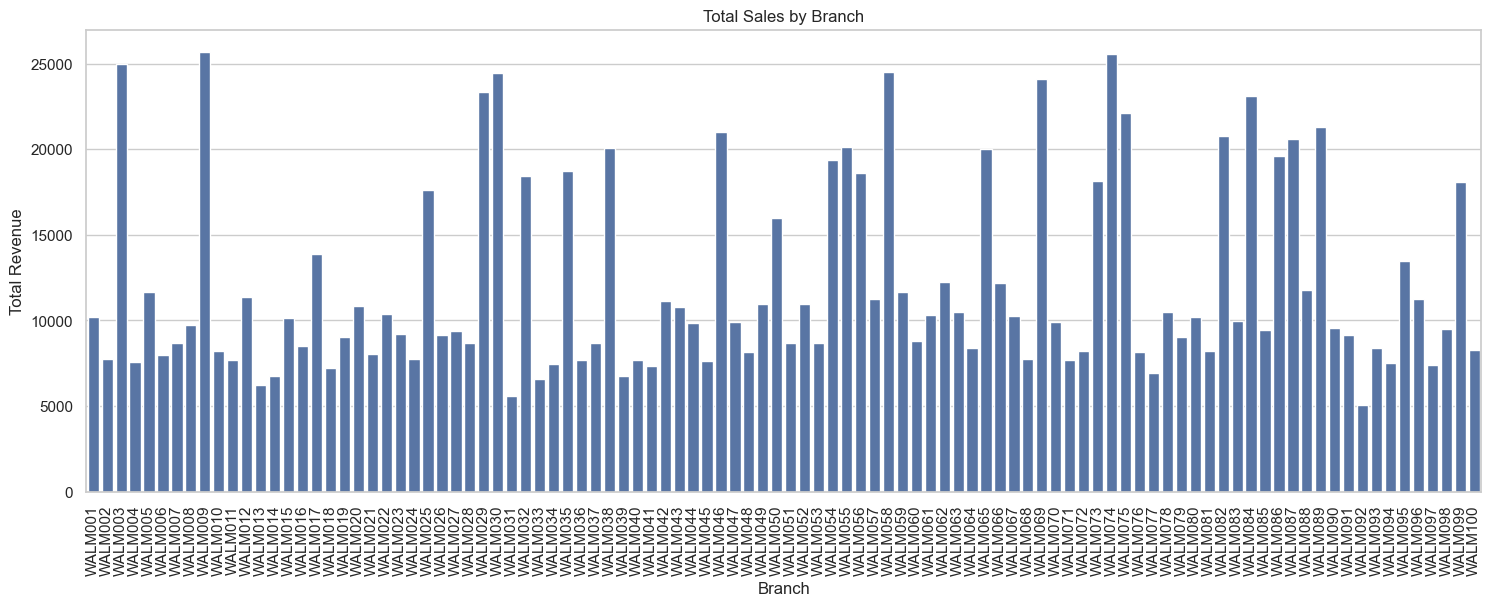

In [28]:
sns.set(style='whitegrid')
branch_sales = df.groupby('Branch')['Total_Amount'].sum().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(data=branch_sales, x='Branch', y='Total_Amount')
plt.title('Total Sales by Branch')
plt.ylabel('Total Revenue')
plt.xticks(rotation =90)
plt.show()

### Sales by Product Category

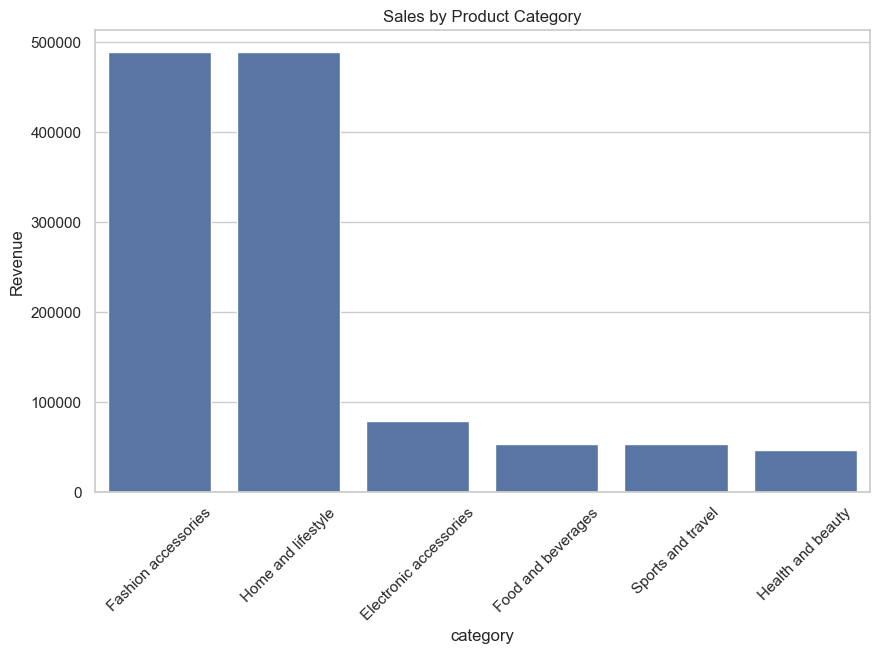

In [29]:
category_sales = df.groupby('category')['Total_Amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=category_sales, x='category', y='Total_Amount')
plt.title('Sales by Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Sales by hour of day

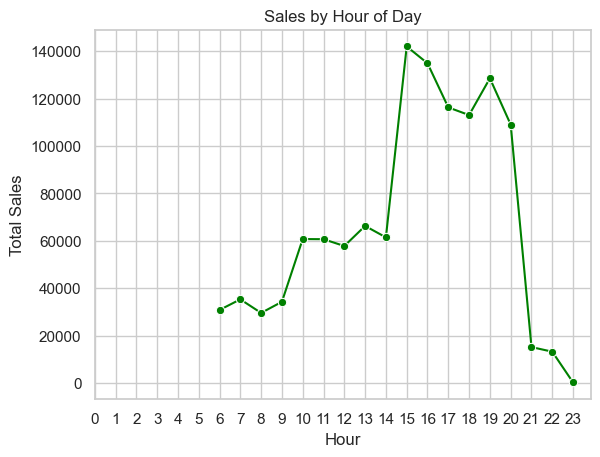

In [30]:
# Extract hour from time column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

hourly_sales = df.groupby('hour')['Total_Amount'].sum().reset_index()

sns.lineplot(data=hourly_sales, x='hour', y='Total_Amount', marker='o', color='green')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.show()

### Sales by city

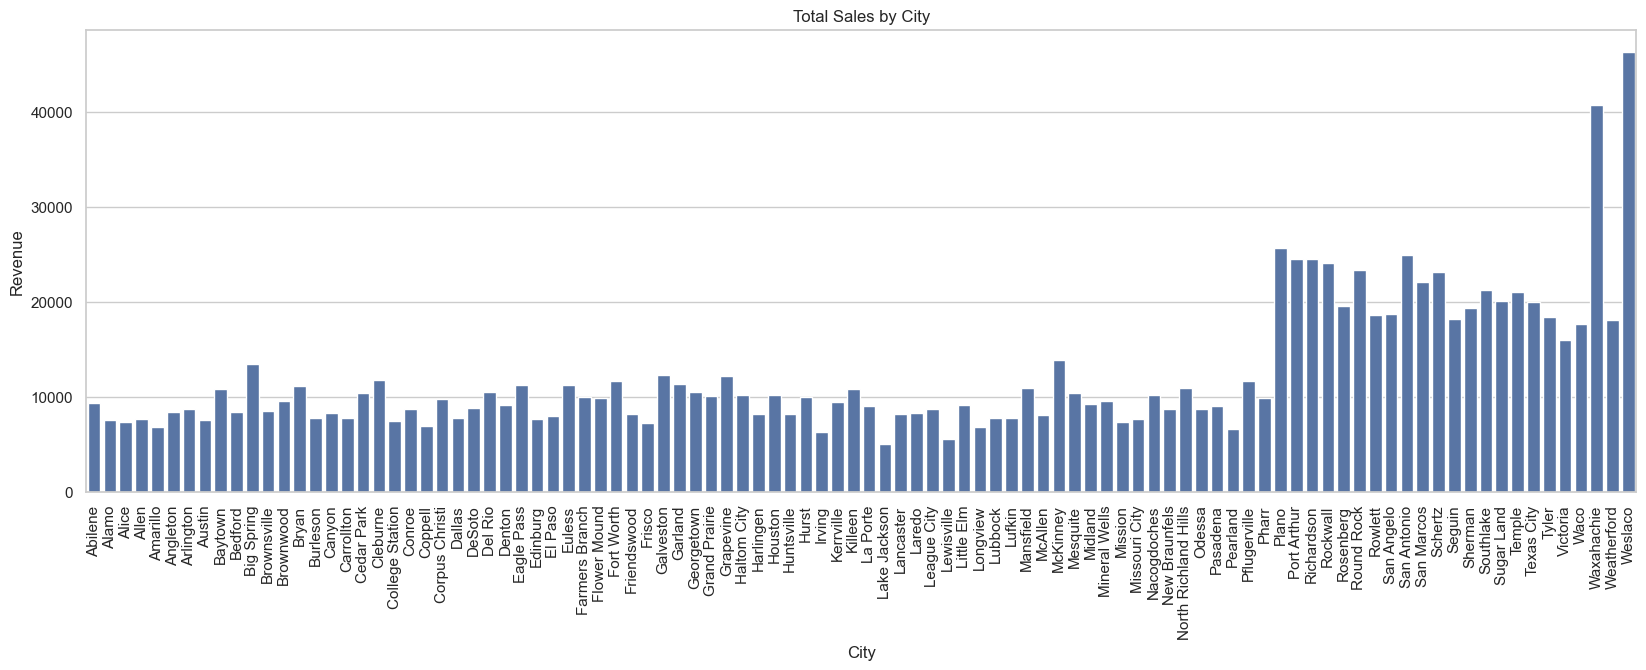

In [31]:
city_sales = df.groupby('City')['Total_Amount'].sum().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(data=city_sales, x='City', y='Total_Amount')
plt.title('Total Sales by City')
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.show()

### Payment method distribution

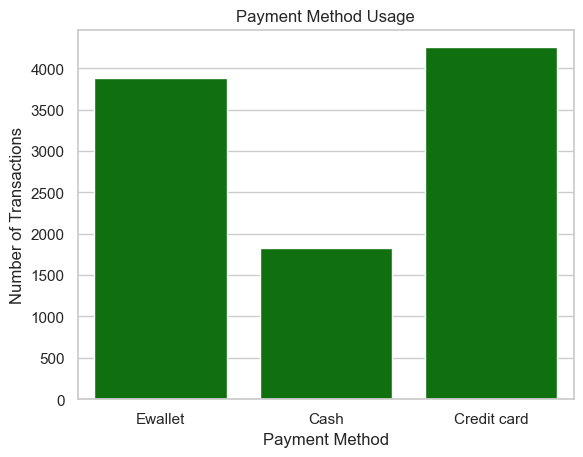

In [19]:
sns.countplot(data=df, x='payment_method', color= 'green')
plt.title('Payment Method Usage')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

### Average Rating by Product Category

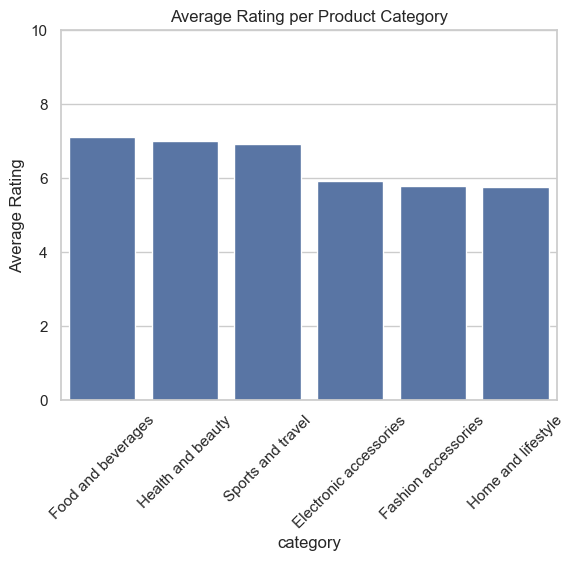

In [20]:
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=avg_rating, x='category', y='rating')
plt.title('Average Rating per Product Category')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.show()

### Correlation Heatmap

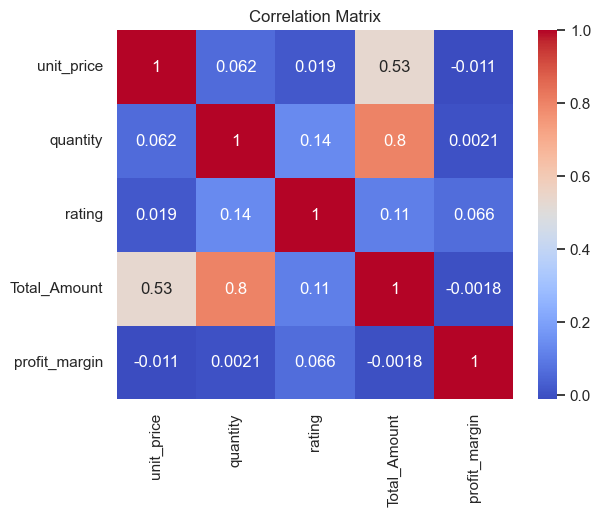

In [32]:
sns.heatmap(df[['unit_price', 'quantity', 'rating', 'Total_Amount', 'profit_margin']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1]:
from getpass import getpass

In [4]:
# prompt user to get password securely
password = getpass.getpass("Enter your MySQL password: ")

Enter your MySQL password:  ········


In [8]:
# MySQL connection
conn = connection.connect(
    host="127.0.0.1",
    user="root",
    password= password,
    database="st_project_1",
    autocommit=True
)


In [37]:
cursor = conn.cursor()

# query
insert_sql = """
INSERT INTO walmart_dataset
(invoice_id, branch, city, category, unit_price, quantity,
 date, time, payment_method, rating, profit_margin)
VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
"""

# data rows
rows = [
    (
        str(row['invoice_id']),
        str(row['Branch']),
        str(row['City']),
        str(row['category']),
        float(row['unit_price']),
        int(row['quantity']),
        row['date'],
        row['time'],
        str(row['payment_method']),
        float(row['rating']),
        float(row['profit_margin'])
    )
    for _, row in df.iterrows()
]

# insert and commit
cursor.executemany(insert_sql, rows)
conn.commit()
print(f"{cursor.rowcount:,} rows inserted into walmart_dataset")

# cleanup
cursor.close()
conn.close()

9,969 rows inserted into walmart_dataset
